<a href="https://colab.research.google.com/github/burakerdal66/Makine_Ogrenmesi_Projeleri/blob/main/FilmOnermeSistemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri seti: https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view

İçerik öneri sistem türleri:


1.   İçerik tabanlı öneri
2.   Popülerliğe dayalı öner
3.   İşbirlikçi öneri








*   Veriler toplanacak.
*   Verilen Önişlemeye alınacak( eksik veriler temizlenecek.  vs)
* Özellik çıkarımı yapılacak( metinsel veriler sayısal verilere çevirilecek vs)





Bağımlılıkların içe aktarılması

In [ ]:
import numpy as np # numpy dizileri oluşturaağız.
import pandas as pd # csv verilerinden pandas dataframeler oluşturmak için kullanılır.
import difflib #yazımlardaki düzeni ayarlamaya yarar.
from sklearn.feature_extraction.text import TfidfVectorizer # metinleri sayısala çevirip spam tahmin sistemi
from sklearn.metrics.pairwise import cosine_similarity #benzerlik yüzdesi oluştururken kullanacağız.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Verilerin toplanması ve Ön işleme

In [ ]:
#cvs dosyasını pandas dataframe ine çevirmek
film_verileri=pd.read_csv('drive_dosya_yolunuz')

In [ ]:
#Veri setinin ilk 5 sütununu verme
film_verileri.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
#veri çerçevesindeki satır ve sütün sayısı
film_verileri.shape

(4803, 24)

In [ ]:
# ilgilendiğimiz  özellikteki sütunların seçilmesi
# film türü, film sloganı,oyuncu kadrosu, yönetmenler ve anahtar kelimeleri alacağız
secilen_ozellikler=["genres","keywords","tagline","cast","director"]
print(secilen_ozellikler)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
#boş değerlerin eksik değerlerini boş metinlere değiştirme
for ozellik in secilen_ozellikler:
  film_verileri[ozellik]=film_verileri[ozellik].fillna("")

In [ ]:
# seçilen tüm dosya özelliklerini birleştirmek.
ozellik_birlestir=film_verileri["genres"]+ " " +film_verileri["keywords"]+ " "+ film_verileri["tagline"]+ " "+film_verileri["cast"]+ " "+film_verileri["director"]
print(ozellik_birlestir)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
#Bu verileri sayısal verilere çevirme. metin verilerini özelik vektörlerine çevirme.
#sayısal veriye çevirirsek kosinüs benzerliğinden metin yakınlığını bulabiliriz.
vectorizer=TfidfVectorizer()


In [ ]:
feature_vector=vectorizer.fit_transform(ozellik_birlestir)

In [ ]:
print(feature_vector)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

Kosinüs benzerliğini kullanma

In [ ]:
#kosinüs benzerliği kullanarak benzerlik kuvvetini  elde etmek
similarity=cosine_similarity(feature_vector)


In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)
#birinci index film indexi, ikincisi benzerlik değeri.

(4803, 4803)


In [ ]:
# kullanııdan en sevdiği film girdisini istemek.
film_ismi=input(" En  sevdiğiniz film ismini giriniz: ")

 En  sevdiğiniz film ismini giriniz: catch me if you can


In [ ]:
# tüm filmlerin olduğu listeyi oluşturmak.
tum_title_listesi=film_verileri['title'].tolist()
print(tum_title_listesi)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
#kullanıcıdan verilen metin için yakın eşleştirmeyi bulmak
yakin_degerleri_bul=difflib.get_close_matches(film_ismi,tum_title_listesi)
print(yakin_degerleri_bul)

['Catch Me If You Can']


In [ ]:
en_yakin_deger=yakin_degerleri_bul[0]
print(en_yakin_deger)

Catch Me If You Can


In [ ]:
  # title ile filmin indexini bulmak
  filmlerin_indexi=film_verileri[film_verileri.title==en_yakin_deger]['index'].values[0]
  print(filmlerin_indexi)

883


In [ ]:
#benzer filmlerin listesine ulaşma
yakinlik_degeri=list(enumerate(similarity[filmlerin_indexi]))
print(yakinlik_degeri)

[(0, 0.01268429563497391), (1, 0.026357002530503562), (2, 0.03984618904595524), (3, 0.06784991004941157), (4, 0.0), (5, 0.013139937207188056), (6, 0.0), (7, 0.0), (8, 0.025051664183472776), (9, 0.0), (10, 0.005432135182065453), (11, 0.0345970942071234), (12, 0.0), (13, 0.004452206741854051), (14, 0.022784118531214335), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.004614256112102113), (19, 0.03253658478004812), (20, 0.030705524070690642), (21, 0.0), (22, 0.029524051155481672), (23, 0.008352299578915838), (24, 0.05254710445159432), (25, 0.08249509199175924), (26, 0.0), (27, 0.004399482455089717), (28, 0.0048301125540836055), (29, 0.031883338273434654), (30, 0.01583279749058633), (31, 0.009492464289851968), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.004548294679611917), (40, 0.00511712010748202), (41, 0.0192713620416566), (42, 0.051502193425548265), (43, 0.00981834987900282), (44, 0.0), (45, 0.002760699069161695), (46, 0.009284927145877737), (47, 0.0), 

In [ ]:
len(yakinlik_degeri)

4803

In [ ]:
# filmleri benzerliklerine göre sıralamak.azalan düzene göre sıralamak
benzer_filmleri_sirala=sorted(yakinlik_degeri,key= lambda x:x[1],reverse=True)
print(benzer_filmleri_sirala)

[(883, 1.0000000000000002), (1409, 0.1835958650211726), (351, 0.1724829199757023), (96, 0.1479475485564351), (1187, 0.14276698632698678), (628, 0.1420867850897968), (250, 0.1308327432428682), (1149, 0.12688786457764178), (3578, 0.12581523312210538), (2597, 0.12447026507534441), (521, 0.12322131552994621), (3014, 0.12269437500917499), (4366, 0.1204212195655), (1612, 0.11922945329331001), (316, 0.1179714791795152), (298, 0.11572083995099185), (1909, 0.11569365537971041), (652, 0.11540495513231742), (3496, 0.11427617139695484), (439, 0.11199694793492364), (3239, 0.11063866731279128), (1169, 0.10994815980427926), (1894, 0.10891529934457017), (2722, 0.10751854159743687), (1038, 0.10721084311262097), (2448, 0.10647729185318401), (1208, 0.10572123244487501), (1380, 0.10571445256890155), (1386, 0.10566751199273071), (1233, 0.1013450028141501), (1422, 0.10062081283472747), (4010, 0.0983762116185543), (1450, 0.09688177001285224), (524, 0.09576518960428221), (176, 0.0948633189929366), (287, 0.094

In [ ]:
# benzer filmlerin isimlerini yazdırma indexine göre
print(" Sizin için önerilen filmler şunlar: \n")
i=1
for film in benzer_filmleri_sirala:
  index=film[0]
  title_from_index=film_verileri[film_verileri.index==index]["title"].values[0]
  if(i<30):
    print(i,".",title_from_index)
    i+=1


 Sizin için önerilen filmler şunlar: 

1 . Catch Me If You Can
2 . J. Edgar
3 . The Departed
4 . Inception
5 . Bridge of Spies
6 . Saving Private Ryan
7 . The Aviator
8 . American Hustle
9 . House Party 2
10 . Confidence
11 . The Terminal
12 . The Dead Zone
13 . Who Killed the Electric Car?
14 . Larry Crowne
15 . Gangs of New York
16 . The Wolf of Wall Street
17 . Legend
18 . Focus
19 . The Flower of Evil
20 . Shutter Island
21 . Stand by Me
22 . 42
23 . War
24 . Seven Psychopaths
25 . The Infiltrator
26 . Wall Street
27 . Jersey Boys
28 . The Man in the Iron Mask
29 . Saving Mr. Banks


Film öneri sistemimizin derlenmiş son hali bu şekildedir:


In [ ]:
film_ismi = input(' En sevdiğiniz yabancı filmi giriniz : ')

tum_title_listesi = film_verileri['title'].tolist()

yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

en_yakin_deger = yakin_degerleri_bul[0]

filmlerin_indexi = film_verileri[film_verileri.title == en_yakin_deger]['index'].values[0]

yakinlik_degeri = list(enumerate(similarity[filmlerin_indexi]))

benzer_filmleri_sirala = sorted(yakinlik_degeri, key = lambda x:x[1], reverse = True)

print('Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : \n')

i = 1
print(f"Yazdığınız metine göre en yakın film ismi {en_yakin_deger}' tir")
for film in benzer_filmleri_sirala:
  index=film[0]
  title_from_index=film_verileri[film_verileri.index==index]["title"].values[0]
  if(i<30):
    print(i,".",title_from_index)
    i+=1

 En sevdiğiniz yabancı filmi giriniz : no counrty for old man
Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : 

Yazdığınız metine göre en yakın film ismi No Country for Old Men' tir
1 . No Country for Old Men
2 . The Three Burials of Melquiades Estrada
3 . Traffic
4 . American Gangster
5 . Drive
6 . El Mariachi
7 . You Will Meet a Tall Dark Stranger
8 . True Grit
9 . Layer Cake
10 . The Gunman
11 . Sin City: A Dame to Kill For
12 . The Counselor
13 . The Homesman
14 . Men in Black 3
15 . Hail, Caesar!
16 . Intolerable Cruelty
17 . Trainspotting
18 . Gangster Squad
19 . Vicky Cristina Barcelona
20 . Blow
21 . Secondhand Lions
22 . Sicario
23 . Batman Forever
24 . Out of the Furnace
25 . Doubt
26 . Eat Pray Love
27 . Smokin' Aces
28 . Skyfall
29 . Run All Night


Bu kodu çalıştırınca şu sorulacak: bir film girin
bunun sonucunda tavsiyeler vereccek

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

#cvs dosyasını pandas dataframe ine çevirmek
film_verileri=pd.read_csv('drive_dosya_yolunuz')
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

ozellik_birlestir = film_verileri["genres"] + " " + film_verileri["keywords"] + " " + film_verileri["tagline"] + " " + film_verileri["cast"] + " " + film_verileri["director"]

# TF-IDF vektörizasyonu
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(ozellik_birlestir)

# K-Means Kümeleme
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(feature_vector)
film_verileri['cluster'] = kmeans.labels_

# Kullanıcıdan film ismi alıp önerilerde bulunma
film_ismi = input("En sevdiğiniz film ismini giriniz: ")
tum_title_listesi = film_verileri['title'].tolist()
yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)
en_yakin_deger = yakin_degerleri_bul[0]
filmlerin_indexi = film_verileri[film_verileri.title == en_yakin_deger]['index'].values[0]

# Filmin ait olduğu kümeyi bulma
film_cluster = film_verileri.loc[film_verileri['index'] == filmlerin_indexi, 'cluster'].values[0]
benzer_filmler = film_verileri[film_verileri['cluster'] == film_cluster]

print('Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : \n')
i = 1
print(f"Yazdığınız metine göre en yakın film ismi {en_yakin_deger}' tir")
for film in benzer_filmler['title'].values[:30]:
    print(i, ".", film)
    i += 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En sevdiğiniz film ismini giriniz: avatar
Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : 

Yazdığınız metine göre en yakın film ismi Avatar' tir
1 . Avatar
2 . John Carter
3 . Avengers: Age of Ultron
4 . Batman v Superman: Dawn of Justice
5 . Superman Returns
6 . Man of Steel
7 . The Avengers
8 . Men in Black 3
9 . Battleship
10 . Jurassic World
11 . Iron Man 3
12 . X-Men: The Last Stand
13 . Transformers: Revenge of the Fallen
14 . Transformers: Age of Extinction
15 . The Amazing Spider-Man 2
16 . TRON: Legacy
17 . Green Lantern
18 . Terminator Salvation
19 . X-Men: Days of Future Past
20 . Star Trek Into Darkness
21 . Pacific Rim
22 . Transformers: Dark of the Moon
23 . Star Trek Beyond
24 . 2012
25 . X-Men: Apocalypse
26 . Iron Man
27 . Wild Wild West
28 . Suicide Squad
29 . Edge of Tomorrow
30 . G.I. Joe: The Rise of Cobra


Cluster kümeleme Benzerlik

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# CSV dosyasını pandas dataframe'e çevirmek
film_verileri = pd.read_csv('drive_dosya_yolunuz')
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

ozellik_birlestir = film_verileri["genres"] + " " + film_verileri["keywords"] + " " + film_verileri["tagline"] + " " + film_verileri["cast"] + " " + film_verileri["director"]

# TF-IDF vektörizasyonu
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(ozellik_birlestir)

# K-Means Kümeleme
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(feature_vector)
film_verileri['cluster'] = kmeans.labels_

# Kullanıcıdan film ismi alıp önerilerde bulunma
film_ismi = input("En sevdiğiniz film ismini giriniz: ")
tum_title_listesi = film_verileri['title'].tolist()
yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)
en_yakin_deger = yakin_degerleri_bul[0]
filmlerin_indexi = film_verileri[film_verileri.title == en_yakin_deger]['index'].values[0]

# Filmin ait olduğu kümeyi bulma
film_cluster = film_verileri.loc[film_verileri['index'] == filmlerin_indexi, 'cluster'].values[0]
benzer_filmler = film_verileri[film_verileri['cluster'] == film_cluster]

# Benzerlik matrisini hesaplama
similarity = cosine_similarity(feature_vector)

# Önerilen filmlerle birlikte uzaklıkları yazdırma
print('Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : \n')
print(f"Yazdığınız metine göre en yakın film ismi {en_yakin_deger}' tir")
i = 1
for film in benzer_filmler.iterrows():
    index = film[1]['index']
    title_from_index = film[1]['title']
    distance = similarity[filmlerin_indexi][index]
    print(f"{i}. {title_from_index} - Benzerlik: {distance:.4f}")
    i += 1
    if i > 30:
        break


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En sevdiğiniz film ismini giriniz: avatar
Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : 

Yazdığınız metine göre en yakın film ismi Avatar' tir
1. Avatar - Benzerlik: 1.0000
2. John Carter - Benzerlik: 0.1070
3. Avengers: Age of Ultron - Benzerlik: 0.0361
4. Superman Returns - Benzerlik: 0.0926
5. Man of Steel - Benzerlik: 0.0692
6. The Avengers - Benzerlik: 0.0343
7. Men in Black 3 - Benzerlik: 0.0571
8. Battleship - Benzerlik: 0.0372
9. Jurassic World - Benzerlik: 0.0408
10. Iron Man 3 - Benzerlik: 0.0606
11. X-Men: The Last Stand - Benzerlik: 0.0359
12. Transformers: Revenge of the Fallen - Benzerlik: 0.0377
13. Transformers: Age of Extinction - Benzerlik: 0.0489
14. TRON: Legacy - Benzerlik: 0.0385
15. Green Lantern - Benzerlik: 0.0345
16. Terminator Salvation - Benzerlik: 0.1348
17. World War Z - Benzerlik: 0.0366
18. X-Men: Days of Future Past - Benzerlik: 0.0943
19. Star Trek Into Darkness - Benzerlik: 0.2012
20. Pacific Rim - Benzerlik: 0.0294
21. Transformers: D

Öklid Uzaklığı

Genetik algoritaması

In [ ]:
import numpy as np
import pandas as pd
import random
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# CSV dosyasını pandas dataframe'ine çevirme
film_verileri = pd.read_csv('drive_dosya_yolunuz')
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]

# Eksik değerleri doldurma
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

# Özellikleri birleştirme
ozellik_birlestir = film_verileri["genres"] + " " + film_verileri["keywords"] + " " + film_verileri["tagline"] + " " + film_verileri["cast"] + " " + film_verileri["director"]

# TF-IDF vektörizasyonu
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(ozellik_birlestir)

# K-Means Kümeleme
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(feature_vector)
film_verileri['cluster'] = kmeans.labels_

# Kullanıcıdan film ismi alıp önerilerde bulunma
film_ismi = input("En sevdiğiniz film ismini giriniz: ")
tum_title_listesi = film_verileri['title'].tolist()
yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)
en_yakin_deger = yakin_degerleri_bul[0]
filmlerin_indexi = film_verileri[film_verileri.title == en_yakin_deger]['index'].values[0]

# Filmin ait olduğu küme indeksini bulma
film_cluster = film_verileri.loc[film_verileri['index'] == filmlerin_indexi, 'cluster'].values[0]
benzer_filmler = film_verileri[film_verileri['cluster'] == film_cluster]

print('Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : \n')
i = 1
print(f"Yazdığınız metine göre en yakın film ismi {en_yakin_deger}'dir.")
for film in benzer_filmler['title'].values[:30]:
    print(i, ".", film)
    i += 1
print()

# Genetik Algoritma
def caprazlama(populasyon):
    yeni_populasyon = []
    for i in range(0, len(populasyon), 2):
        if random.random() < caprazlama_orani:
            birey1 = populasyon[i]
            birey2 = populasyon[i + 1]
            caprazlama_noktasi = random.randint(0, len(film_verileri) - 1)
            yeni_birey1 = {'index': birey1['index']}
            yeni_birey2 = {'index': birey2['index']}

            index1 = birey1['index'].split()
            index2 = birey2['index'].split()

            yeni_birey1['index'] = ' '.join(index1[:caprazlama_noktasi] + index2[caprazlama_noktasi:])
            yeni_birey2['index'] = ' '.join(index2[:caprazlama_noktasi] + index1[caprazlama_noktasi:])

            yeni_populasyon.append(yeni_birey1)
            yeni_populasyon.append(yeni_birey2)
        else:
            yeni_populasyon.append(populasyon[i])
            yeni_populasyon.append(populasyon[i + 1])
    return yeni_populasyon

def mutasyon(populasyon):
    for birey in populasyon:
        if random.random() < mutasyon_orani:
            mutasyon_noktasi = random.randint(0, len(film_verileri) - 1)
            index = birey['index'].split()
            index[mutasyon_noktasi] = str(1 - int(index[mutasyon_noktasi]))
            birey['index'] = ' '.join(index)
    return populasyon

def uygunluk_hesapla(populasyon):
    uygunluk_degerleri = []
    for birey in populasyon:
        # Bireyin özelliklerine göre uygunluk hesaplanması
        index = birey['index'].split()
        benzer_filmler = film_verileri[film_verileri['index'].isin([int(i) for i, v in enumerate(index) if v == '1'])]
        uygunluk = len(benzer_filmler)
        uygunluk_degerleri.append(uygunluk)
    return uygunluk_degerleri

def turnuva_secimi(populasyon, uygunluk_degerleri):
    yeni_populasyon = []
    for i in range(len(populasyon)):
        birey1 = random.choice(populasyon)
        birey2 = random.choice(populasyon)
        if uygunluk_degerleri[populasyon.index(birey1)] > uygunluk_degerleri[populasyon.index(birey2)]:
            yeni_populasyon.append(birey1)
        else:
            yeni_populasyon.append(birey2)
    return yeni_populasyon

def genetik_algoritma(populasyon):
    for j in range(nesil_sayisi):
        uygunluk_degerleri = uygunluk_hesapla(populasyon)
        yeni_populasyon = turnuva_secimi(populasyon, uygunluk_degerleri)
        yeni_populasyon = caprazlama(yeni_populasyon)
        yeni_populasyon = mutasyon(yeni_populasyon)
        populasyon = yeni_populasyon
    return populasyon

# Parametreler
nesil_sayisi = 100
populasyon_sayisi = 100
caprazlama_orani = 0.8
mutasyon_orani = 0.2

# Başlangıç populasyonu oluşturma
populasyon = []
for i in range(populasyon_sayisi):
    birey = {'index': ' '.join(map(str, np.random.randint(2, size=len(film_verileri))))}
    populasyon.append(birey)

# Genetik algoritmayı çalıştırma
en_iyi_birey = genetik_algoritma(populasyon)[0]

# En iyi bireyin önerdiği filmleri bulma
index = en_iyi_birey['index'].split()
en_iyi_bireyin_filmleri = film_verileri.iloc[[int(i) for i, v in enumerate(index) if v == '1']]

# Kullanıcıya önerilen filmleri gösterme
print('Sizin için önerilen filmler sıralanmıştır. Keyifli seyirler!\n')
for i, film in enumerate(en_iyi_bireyin_filmleri['title'].values[:30], 1):
    print(f"{i}. {film}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En sevdiğiniz film ismini giriniz: avatar
Sizin için seçilen filmler sıralanmıştır. Keyifli Seyirler : 

Yazdığınız metine göre en yakın film ismi Avatar'dir.
1 . Avatar
2 . Superman Returns
3 . Men in Black 3
4 . Captain America: Civil War
5 . Battleship
6 . Jurassic World
7 . Iron Man 3
8 . Transformers: Revenge of the Fallen
9 . Transformers: Age of Extinction
10 . TRON: Legacy
11 . Green Lantern
12 . Terminator Salvation
13 . World War Z
14 . Star Trek Into Darkness
15 . Pacific Rim
16 . Transformers: Dark of the Moon
17 . Star Trek Beyond
18 . 2012
19 . Jupiter Ascending
20 . Monsters vs Aliens
21 . Iron Man
22 . Suicide Squad
23 . Edge of Tomorrow
24 . G.I. Joe: The Rise of Cobra
25 . Dawn of the Planet of the Apes
26 . The Lovers
27 . Captain America: The Winter Soldier
28 . Tomorrowland
29 . Independence Day: Resurgence
30 . Terminator 3: Rise of the Machines

Sizin için önerilen filmler sıralanmıştır. Keyifli seyirler!

1. Avatar
2. Pirates of the Caribbean: At World's End
3. 

Kosinüs

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

film_verileri=pd.read_csv('drive_dosya_yolunuz')

secilen_ozellikler=["genres","keywords","tagline","cast","director"]
for ozellik in secilen_ozellikler:
  film_verileri[ozellik]=film_verileri[ozellik].fillna("")

ozellik_birlestir=film_verileri["genres"]+ " " +film_verileri["keywords"]+ " "+ film_verileri["tagline"]+ " "+film_verileri["cast"]+ " "+film_verileri["director"]

vectorizer=TfidfVectorizer()

feature_vector=vectorizer.fit_transform(ozellik_birlestir)
similarity=cosine_similarity(feature_vector)
film_ismi=input(" En  sevdiğiniz film ismini giriniz: ")
tum_title_listesi=film_verileri['title'].tolist()
yakin_degerleri_bul=difflib.get_close_matches(film_ismi,tum_title_listesi)
en_yakin_deger=yakin_degerleri_bul[0]
filmlerin_indexi=film_verileri[film_verileri.title==en_yakin_deger]['index'].values[0]
yakinlik_degeri=list(enumerate(similarity[filmlerin_indexi]))
benzer_filmleri_sirala=sorted(yakinlik_degeri,key= lambda x:x[1],reverse=True)
print(" Sizin için önerilen filmler şunlar: \n")
i=1
for film in benzer_filmleri_sirala:
  index=film[0]
  title_from_index=film_verileri[film_verileri.index==index]["title"].values[0]
  if(i<11):
    print(i,".",title_from_index)
    i+=1


 En  sevdiğiniz film ismini giriniz: avatar
 Sizin için önerilen filmler şunlar: 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies


KNN Algoritması

Knn değerler ile birlikte

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import difflib

film_verileri = pd.read_csv('drive_dosya_yolunuz')

secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]

for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(feature_vector)

def benzer_filmleri_oner(film_verisi, knn_model, vectorizer, film_ismi, k=10):
    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]

    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]

    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()

    benzerlikler, indisler = knn_model.kneighbors(vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]), n_neighbors=k+1)

    onerilen_filmler = []
    for i in range(1, len(benzerlikler.flatten())):
        onerilen_filmler.append(film_verisi.iloc[indisler.flatten()[i]])

    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı:\n")
    for i, film in enumerate(onerilen_filmler):
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlikler.flatten()[i+1]:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()

film_ismi = input("En sevdiğiniz film ismini giriniz: ")

benzer_filmleri_oner(film_verileri, knn_model, vectorizer, film_ismi)


En sevdiğiniz film ismini giriniz: avatar
Girdiğiniz Film:

Film İsmi: Avatar
Türü: Action Adventure Fantasy Science Fiction
Anahtar Kelime: culture clash future space war space colony society
Slogan: Enter the World of Pandora.
Kast Ekibi: Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez
Yönetmen: James Cameron

Sizin için önerilen filmler Avatar'e göre sıralandı:

1. Alien - Benzerlik: 0.7505
    Türü: Horror Action Thriller Science Fiction
    Anahtar Kelime: android countdown space marine space suit beheading
    Slogan: In space no one can hear you scream.
    Kast Ekibi: Tom Skerritt Sigourney Weaver Veronica Cartwright Harry Dean Stanton John Hurt
    Yönetmen: Ridley Scott

2. Aliens - Benzerlik: 0.7516
    Türü: Horror Action Thriller Science Fiction
    Anahtar Kelime: android extraterrestrial technology space marine spaceman cryogenics
    Slogan: This Time It's War
    Kast Ekibi: Sigourney Weaver Michael Biehn James Remar Paul Reiser Lance Henri

K-Means

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import difflib


film_verileri = pd.read_csv('drive_dosya_yolunuz')


secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]


for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")


film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])

num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(feature_vector)

def benzer_filmleri_oner(film_verisi, kmeans_model, vectorizer, film_ismi, k=10):

    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]


    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]


    film_vector = vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]])
    cluster_num = kmeans_model.predict(film_vector)[0]


    cluster_indices = np.where(kmeans_model.labels_ == cluster_num)[0]


    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()


    onerilen_filmler = []
    for index in cluster_indices:
        if index != filmlerin_indexi:
            onerilen_filmler.append(film_verisi.iloc[index])


    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı:\n")
    for i, film in enumerate(onerilen_filmler[:k]):
        print(f"{i+1}. {film['title']}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()


film_ismi = input("En sevdiğiniz film ismini giriniz: ")


benzer_filmleri_oner(film_verileri, kmeans_model, vectorizer, film_ismi)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En sevdiğiniz film ismini giriniz: avatar
Girdiğiniz Film:

Film İsmi: Avatar
Türü: Action Adventure Fantasy Science Fiction
Anahtar Kelime: culture clash future space war space colony society
Slogan: Enter the World of Pandora.
Kast Ekibi: Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez
Yönetmen: James Cameron

Sizin için önerilen filmler Avatar'e göre sıralandı:

1. Avengers: Age of Ultron
    Türü: Action Adventure Science Fiction
    Anahtar Kelime: marvel comic sequel superhero based on comic book vision
    Slogan: A New Age Has Come.
    Kast Ekibi: Robert Downey Jr. Chris Hemsworth Mark Ruffalo Chris Evans Scarlett Johansson
    Yönetmen: Joss Whedon

2. Superman Returns
    Türü: Adventure Fantasy Action Science Fiction
    Anahtar Kelime: saving the world dc comics invulnerability sequel superhero
    Slogan: 
    Kast Ekibi: Brandon Routh Kevin Spacey Kate Bosworth James Marsden Parker Posey
    Yönetmen: Bryan Singer

3. Man of Steel
    Türü: A

Deep Learning
(Matris Ayrışımı):

Mode Eğitimi

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Veri setini yükleme
film_verileri = pd.read_csv('drive_dosya_yolunuz')

# İlgilendiğimiz özellikleri seçme
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]

# Boş değerleri boş metin olarak doldurma
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

# Tüm özellikleri birleştirme
film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

# TF-IDF vektörlerine dönüştürme
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])

# Convert to numpy array and normalize
feature_vector_normalized = normalize(feature_vector.toarray())

# Keras Autoencoder modelini oluşturma
input_dim = feature_vector.shape[1]
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dropout(0.2)(encoder)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(lr=0.001), loss="mse")

# Modeli eğitme
autoencoder.fit(feature_vector_normalized, feature_vector_normalized,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_split=0.2,
                callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Modeli kaydetme
autoencoder.save('drive_dosya_yolunuz')


Epoch 1/50
121/121 [==============================] - 11s 85ms/step - loss: 0.1265 - val_loss: 0.0108
Epoch 2/50
121/121 [==============================] - 8s 69ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 3/50
121/121 [==============================] - 10s 81ms/step - loss: 6.9267e-04 - val_loss: 0.0020
Epoch 4/50
121/121 [==============================] - 8s 70ms/step - loss: 3.8831e-04 - val_loss: 0.0014
Epoch 5/50
121/121 [==============================] - 10s 80ms/step - loss: 2.6228e-04 - val_loss: 0.0011
Epoch 6/50
121/121 [==============================] - 10s 85ms/step - loss: 1.9898e-04 - val_loss: 8.7416e-04
Epoch 7/50
121/121 [==============================] - 8s 69ms/step - loss: 1.6161e-04 - val_loss: 7.3777e-04
Epoch 8/50
121/121 [==============================] - 10s 81ms/step - loss: 1.3695e-04 - val_loss: 6.3976e-04
Epoch 9/50
121/121 [==============================] - 9s 77ms/step - loss: 1.2050e-04 - val_loss: 5.6523e-04
Epoch 10/50
121/121 [=====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Deep Learning

En sevdiğiniz film ismini giriniz: avatar


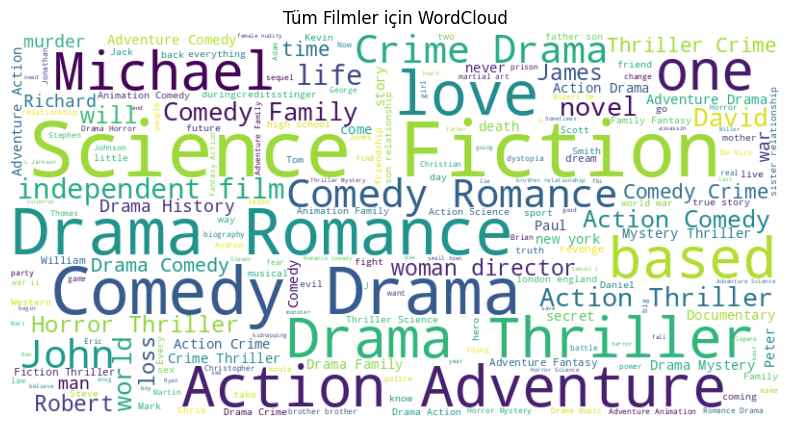

Girdiğiniz Film:

Film İsmi: Avatar
Türü: Action Adventure Fantasy Science Fiction
Anahtar Kelime: culture clash future space war space colony society
Slogan: Enter the World of Pandora.
Kast Ekibi: Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez
Yönetmen: James Cameron

Sizin için önerilen filmler Avatar'e göre sıralandı:

1. Alien - Benzerlik: 1.0000
    Türü: Horror Action Thriller Science Fiction
    Anahtar Kelime: android countdown space marine space suit beheading
    Slogan: In space no one can hear you scream.
    Kast Ekibi: Tom Skerritt Sigourney Weaver Veronica Cartwright Harry Dean Stanton John Hurt
    Yönetmen: Ridley Scott

2. Aliens - Benzerlik: 0.2495
    Türü: Horror Action Thriller Science Fiction
    Anahtar Kelime: android extraterrestrial technology space marine spaceman cryogenics
    Slogan: This Time It's War
    Kast Ekibi: Sigourney Weaver Michael Biehn James Remar Paul Reiser Lance Henriksen
    Yönetmen: James Cameron

3. Guard

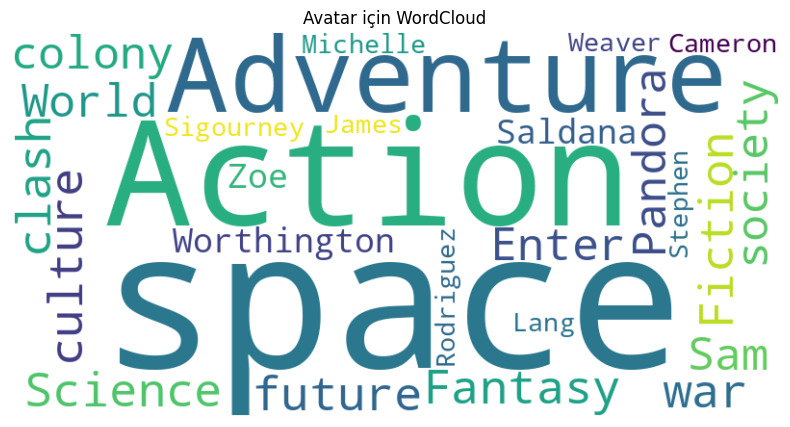

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from sklearn.preprocessing import normalize
import difflib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Veri setini yükleme
film_verileri = pd.read_csv('drive_dosya_yolunuz')


secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]

for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])

feature_vector_normalized = normalize(feature_vector.toarray())

autoencoder = load_model('drive_dosya_yolunuz')

input_dim = feature_vector.shape[1]
input_layer = Input(shape=(input_dim,))
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)

def wordcloud_olustur(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

combined_features_text = ' '.join(film_verileri['combined_features'])

def benzer_filmleri_oner(film_verisi, encoder_model, vectorizer, film_ismi, k=10):
    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]

    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]


    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()

    film_vector = vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]).toarray()
    film_vector_normalized = normalize(film_vector)

    benzerlik_skorlari = []
    for i in range(len(feature_vector_normalized)):
        benzerlik_skoru = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[i])
        benzerlik_skorlari.append((i, benzerlik_skoru))


    benzerlik_skorlari.sort(key=lambda x: x[1], reverse=True)


    onerilen_filmler = []
    for i in range(1, k+1):
        index = benzerlik_skorlari[i][0]
        onerilen_filmler.append(film_verisi.iloc[index])


    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı:\n")
    for i, film in enumerate(onerilen_filmler):
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlik_skorlari[i][1]:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()

    film_text = film_verisi.iloc[filmlerin_indexi]["combined_features"]
    wordcloud_olustur(film_text, title=f"{film_verisi.iloc[filmlerin_indexi]['title']} için WordCloud")


film_ismi = input("En sevdiğiniz film ismini giriniz: ")
wordcloud_olustur(combined_features_text, title="Tüm Filmler için WordCloud")


benzer_filmleri_oner(film_verileri, encoder_model, vectorizer, film_ismi)


Word Cloud

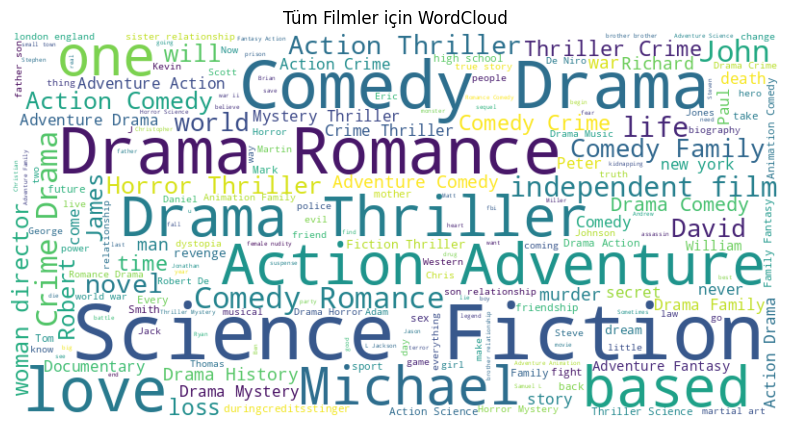

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from sklearn.preprocessing import normalize
import difflib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Veri setini yükleme
film_verileri = pd.read_csv('drive_dosya_yolunuz)

# İlgilendiğimiz özellikleri seçme
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]

# Boş değerleri boş metin olarak doldurma
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

# Tüm özellikleri birleştirme
film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

# TF-IDF vektörlerine dönüştürme
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])

# Convert to numpy array and normalize
feature_vector_normalized = normalize(feature_vector.toarray())

# Kaydedilmiş modeli yükleme
autoencoder = load_model('drive_dosya_yolunuz')

# Encoder modelini oluşturma
input_dim = feature_vector.shape[1]
input_layer = Input(shape=(input_dim,))
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)

def wordcloud_olustur(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Tüm filmler için WordCloud oluşturma
combined_features_text = ' '.join(film_verileri['combined_features'])
wordcloud_olustur(combined_features_text, title="Tüm Filmler için WordCloud")


Genetik Arama

In [ ]:
from deap import base, creator, tools, algorithms
import random

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from sklearn.preprocessing import normalize
import difflib
import matplotlib.pyplot as plt
from wordcloud import WordCloud


film_verileri = pd.read_csv('drive_dosya_yolunuz')


secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]


for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")


film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)


vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])


feature_vector_normalized = normalize(feature_vector.toarray())


autoencoder = load_model('drive_dosya_yolunuz')


input_dim = feature_vector.shape[1]
input_layer = Input(shape=(input_dim,))
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)

def wordcloud_olustur(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()


combined_features_text = ' '.join(film_verileri['combined_features'])

def benzer_filmleri_oner_genetik(film_verisi, encoder_model, vectorizer, film_ismi, k=10, pop_size=50, ngen=10, cxpb=0.5, mutpb=0.2):
    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]


    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]


    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()


    film_vector = vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]).toarray()
    film_vector_normalized = normalize(film_vector)


    def fitness(individual):
        indices = individual
        scores = []
        for idx in indices:
            score = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[idx])
            scores.append(score)
        return np.mean(scores),


    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("indices", random.sample, range(len(feature_vector_normalized)), k)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)


    population = toolbox.population(n=pop_size)
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=False)


    top_individuals = tools.selBest(population, k=1)
    best_indices = top_individuals[0]


    onerilen_filmler = [film_verisi.iloc[idx] for idx in best_indices]


    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı:\n")
    for i, film in enumerate(onerilen_filmler):
        benzerlik_skoru = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[best_indices[i]])
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlik_skoru:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()


    film_text = film_verisi.iloc[filmlerin_indexi]["combined_features"]


film_ismi = input("En sevdiğiniz film ismini giriniz: ")


benzer_filmleri_oner_genetik(film_verileri, encoder_model, vectorizer, film_ismi)
#wordcloud_olustur(film_text, title=f"{film_verisi.iloc[filmlerin_indexi]['title']} için WordCloud")


En sevdiğiniz film ismini giriniz: avatar
Girdiğiniz Film:

Film İsmi: Avatar
Türü: Action Adventure Fantasy Science Fiction
Anahtar Kelime: culture clash future space war space colony society
Slogan: Enter the World of Pandora.
Kast Ekibi: Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez
Yönetmen: James Cameron

Sizin için önerilen filmler Avatar'e göre sıralandı:

1. Furious 7 - Benzerlik: 0.0888
    Türü: Action
    Anahtar Kelime: car race speed revenge suspense car
    Slogan: Vengeance Hits Home
    Kast Ekibi: Vin Diesel Paul Walker Dwayne Johnson Michelle Rodriguez Tyrese Gibson
    Yönetmen: James Wan

2. Sunshine State - Benzerlik: 0.0166
    Türü: Drama
    Anahtar Kelime: independent film
    Slogan: Greetings from ...
    Kast Ekibi: Alan King Angela Bassett Timothy Hutton Mary Steenburgen Clifton James
    Yönetmen: John Sayles

3. Aliens in the Attic - Benzerlik: 0.0597
    Türü: Adventure Comedy Family Fantasy Science Fiction
    Anahtar Keli

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


----- Ana Menü -----
1. TF-IDF ve KNN Tabanlı Benzerlik Önerisi
2. K-Means Tabanlı Kümeleme Önerisi
3. Cosine Similarity Tabanlı Benzerlik Önerisi
4. Deep Learning Tabanlı Benzerlik Önerisi
5. Genetik Algoritma Tabanlı Benzerlik Önerisi
6. Çıkış
Girdiğiniz Film:

Film İsmi: Avatar
Türü: Action Adventure Fantasy Science Fiction
Anahtar Kelime: culture clash future space war space colony society
Slogan: Enter the World of Pandora.
Kast Ekibi: Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez
Yönetmen: James Cameron

Sizin için önerilen filmler Avatar'e göre sıralandı (TF-IDF ve KNN):

1. Alien - Benzerlik: 0.7505
    Türü: Horror Action Thriller Science Fiction
    Anahtar Kelime: android countdown space marine space suit beheading
    Slogan: In space no one can hear you scream.
    Kast Ekibi: Tom Skerritt Sigourney Weaver Veronica Cartwright Harry Dean Stanton John Hurt
    Yönetmen: Ridley Scott

2. Aliens - Benzerlik: 0.7516
    Türü: Horror Action Thrille

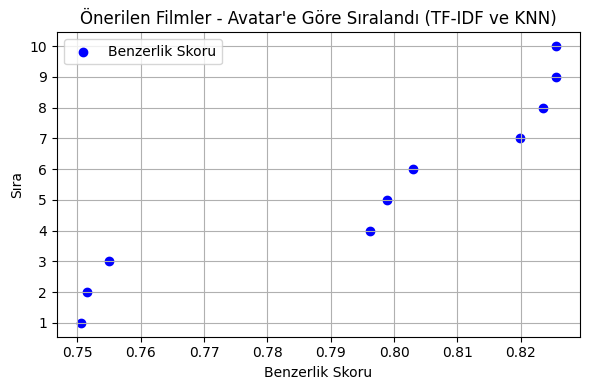

----- Ana Menü -----
1. TF-IDF ve KNN Tabanlı Benzerlik Önerisi
2. K-Means Tabanlı Kümeleme Önerisi
3. Cosine Similarity Tabanlı Benzerlik Önerisi
4. Deep Learning Tabanlı Benzerlik Önerisi
5. Genetik Algoritma Tabanlı Benzerlik Önerisi
6. Çıkış
Yapmak istediğiniz işlemi seçin (1/2/3/4/5/6): 6
Programdan çıkılıyor...


In [ ]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import difflib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from deap import base, creator, tools, algorithms
import random
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

film_verileri = pd.read_csv('drive_dosya_yolunuz')


secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]


for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")


film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)


vectorizer_tfidf = TfidfVectorizer()
feature_vector_tfidf = vectorizer_tfidf.fit_transform(film_verileri["combined_features"])


autoencoder = load_model('drive_dosya_yolunuz')


input_dim = feature_vector.shape[1]
input_layer = Input(shape=(input_dim,))
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)


knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(feature_vector_tfidf)


ozellik_birlestir=film_verileri["genres"]+ " " +film_verileri["keywords"]+ " "+ film_verileri["tagline"]+ " "+film_verileri["cast"]+ " "+film_verileri["director"]
feature_vector=vectorizer_tfidf.fit_transform(ozellik_birlestir)

feature_vector_normalized = normalize(feature_vector.toarray())
similarity=cosine_similarity(feature_vector)

num_clusters = 10
vectorizer_kmeans = TfidfVectorizer()
feature_vector_kmeans = vectorizer_kmeans.fit_transform(film_verileri["combined_features"])
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(feature_vector_kmeans)

combined_features_text = ' '.join(film_verileri['combined_features'])


def wordcloud_olustur(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()



def benzer_filmleri_oner(film_verisi, knn_model, vectorizer, film_ismi, k=10):

    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]


    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]


    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()


    benzerlikler, indisler = knn_model.kneighbors(vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]), n_neighbors=k+1)

    onerilen_filmler = []
    for i in range(1, len(benzerlikler.flatten())):
        onerilen_filmler.append(film_verisi.iloc[indisler.flatten()[i]])


    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı (TF-IDF ve KNN):\n")
    for i, film in enumerate(onerilen_filmler):
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlikler.flatten()[i+1]:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()


    plt.figure(figsize=(6, 4))
    plt.scatter(benzerlikler.flatten()[1:], np.arange(1, k+1), marker='o', c='blue', label='Benzerlik Skoru')
    plt.title(f"Önerilen Filmler - {en_yakin_deger}'e Göre Sıralandı (TF-IDF ve KNN)")
    plt.xlabel('Benzerlik Skoru')
    plt.ylabel('Sıra')
    plt.yticks(np.arange(1, k+1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def kumeleme_tabanli_filmleri_oner(film_verisi, kmeans_model, vectorizer, film_ismi, k=10):

    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]


    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]


    film_vector = vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]])
    cluster_num = kmeans_model.predict(film_vector)[0]

    cluster_indices = np.where(kmeans_model.labels_ == cluster_num)[0]

    onerilen_filmler = []
    for index in cluster_indices:
        if index != filmlerin_indexi:
            onerilen_filmler.append(film_verisi.iloc[index])

    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı (K-Means):\n")
    for i, film in enumerate(onerilen_filmler[:k]):
        print(f"{i+1}. {film['title']}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()

    plt.figure(figsize=(6, 4))
    plt.scatter(np.arange(1, k+1), np.zeros(k), marker='o', c='red', label='Küme Numarası')
    plt.title(f"Önerilen Filmler - {en_yakin_deger}'e Göre Sıralandı (K-Means)")
    plt.xlabel('Sıra')
    plt.ylabel('Küme Numarası')
    plt.yticks([])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def cosine_similarity_tabanli_oneri(film_verisi, vectorizer, similarity_matrix, film_ismi, k=10):

    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]


    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]


    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()


    benzerlikler, indisler = knn_model.kneighbors(vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]), n_neighbors=k+1)


    onerilen_filmler = []
    for i in range(1, len(benzerlikler.flatten())):
        onerilen_filmler.append(film_verisi.iloc[indisler.flatten()[i]])


    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı (Cosine Similarity ve KNN):\n")
    for i, film in enumerate(onerilen_filmler):
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlikler.flatten()[i+1]:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.scatter(benzerlikler.flatten()[1:], np.arange(1, k+1), marker='o', c='green', label='Benzerlik Skoru')
    plt.title(f"Önerilen Filmler - {en_yakin_deger}'e Göre Sıralandı (Cosine Similarity ve KNN)")
    plt.xlabel('Benzerlik Skoru')
    plt.ylabel('Sıra')
    plt.yticks(np.arange(1, k+1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def deep_learning_tabanli_oneri(film_verisi, encoder_model, knn_model, vectorizer, film_ismi, k=10):
    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]

    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]

    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()

    film_vector = vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]).toarray()
    film_vector_normalized = normalize(film_vector)

    benzerlik_skorlari = []
    for i in range(len(feature_vector_normalized)):
        benzerlik_skoru = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[i])
        benzerlik_skorlari.append((i, benzerlik_skoru))

    benzerlik_skorlari.sort(key=lambda x: x[1], reverse=True)

    onerilen_filmler = []
    for i in range(1, k+1):
        index = benzerlik_skorlari[i][0]
        onerilen_filmler.append(film_verisi.iloc[index])
    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı (Deep Learning):\n")
    for i, film in enumerate(onerilen_filmler):
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlik_skorlari[i][1]:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()

    plt.figure(figsize=(6, 4))
    plt.scatter([score[1] for score in benzerlik_skorlari[:k]], np.arange(1, k+1), marker='o', c='purple', label='Benzerlik Skoru')
    plt.title(f"Önerilen Filmler - {en_yakin_deger}'e Göre Sıralandı (Deep Learning)")
    plt.xlabel('Benzerlik Skoru')
    plt.ylabel('Sıra')
    plt.yticks(np.arange(1, k+1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def benzer_filmleri_oner_genetik(film_verisi, encoder_model, vectorizer, film_ismi, k=10, pop_size=50, ngen=10, cxpb=0.5, mutpb=0.2):
    tum_title_listesi = film_verisi['title'].tolist()
    yakin_degerleri_bul = difflib.get_close_matches(film_ismi, tum_title_listesi)

    if not yakin_degerleri_bul:
        print(f"{film_ismi} isimli film veri setinde bulunamadı veya benzer bir film bulunamadı.")
        return

    en_yakin_deger = yakin_degerleri_bul[0]

    filmlerin_indexi = film_verisi[film_verisi.title == en_yakin_deger].index[0]

    print(f"Girdiğiniz Film:\n")
    print(f"Film İsmi: {film_verisi.iloc[filmlerin_indexi]['title']}")
    print(f"Türü: {film_verisi.iloc[filmlerin_indexi]['genres']}")
    print(f"Anahtar Kelime: {film_verisi.iloc[filmlerin_indexi]['keywords']}")
    print(f"Slogan: {film_verisi.iloc[filmlerin_indexi]['tagline']}")
    print(f"Kast Ekibi: {film_verisi.iloc[filmlerin_indexi]['cast']}")
    print(f"Yönetmen: {film_verisi.iloc[filmlerin_indexi]['director']}")
    print()

    film_vector = vectorizer.transform([film_verisi.iloc[filmlerin_indexi]["combined_features"]]).toarray()
    film_vector_normalized = normalize(film_vector)

    def fitness(individual):
        indices = individual
        scores = []
        for idx in indices:
            score = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[idx])
            scores.append(score)
        return np.mean(scores),

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("indices", random.sample, range(len(feature_vector_normalized)), k)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=pop_size)
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=False)

    top_individuals = tools.selBest(population, k=1)
    best_indices = top_individuals[0]

    onerilen_filmler = [film_verisi.iloc[idx] for idx in best_indices]
    benzerlik_skorlari = []
    for i in range(len(feature_vector_normalized)):
        benzerlik_skoru = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[i])
        benzerlik_skorlari.append((i, benzerlik_skoru))

    benzerlik_skorlari.sort(key=lambda x: x[1], reverse=True)

    print(f"Sizin için önerilen filmler {en_yakin_deger}'e göre sıralandı:\n")
    for i, film in enumerate(onerilen_filmler):
        benzerlik_skoru = np.dot(film_vector_normalized.flatten(), feature_vector_normalized[best_indices[i]])
        print(f"{i+1}. {film['title']} - Benzerlik: {benzerlik_skoru:.4f}")
        print(f"    Türü: {film['genres']}")
        print(f"    Anahtar Kelime: {film['keywords']}")
        print(f"    Slogan: {film['tagline']}")
        print(f"    Kast Ekibi: {film['cast']}")
        print(f"    Yönetmen: {film['director']}")
        print()

    film_text = film_verisi.iloc[filmlerin_indexi]["combined_features"]

    plt.figure(figsize=(6, 4))
    plt.scatter([score[1] for score in benzerlik_skorlari[:k]], np.arange(1, k+1), marker='o', c='orange', label='Benzerlik Skoru')
    plt.title(f"Önerilen Filmler - {en_yakin_deger}'e Göre Sıralandı (Genetik Algoritma)")
    plt.xlabel('Benzerlik Skoru')
    plt.ylabel('Sıra')
    plt.yticks(np.arange(1, k+1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def ana_menu():
    while True:
        print("----- Ana Menü -----")
        print("1. TF-IDF ve KNN Tabanlı Benzerlik Önerisi")
        print("2. K-Means Tabanlı Kümeleme Önerisi")
        print("3. Cosine Similarity Tabanlı Benzerlik Önerisi")
        print("4. Deep Learning Tabanlı Benzerlik Önerisi")
        print("5. Genetik Algoritma Tabanlı Benzerlik Önerisi")
        print("6. Çıkış")


        secim = input("Yapmak istediğiniz işlemi seçin (1/2/3/4/5/6): ")

        if secim == "1":
            film_ismi = input("En sevdiğiniz film ismini giriniz: ")
            benzer_filmleri_oner(film_verileri, knn_model, vectorizer_tfidf, film_ismi)
        elif secim == "2":
            film_ismi = input("En sevdiğiniz film ismini giriniz: ")
            kumeleme_tabanli_filmleri_oner(film_verileri, kmeans_model, vectorizer_kmeans, film_ismi)
        elif secim == "3":
            film_ismi = input("En sevdiğiniz film ismini giriniz: ")
            cosine_similarity_tabanli_oneri(film_verileri, vectorizer_tfidf, similarity, film_ismi)
        elif secim == "4":
            film_ismi = input("En sevdiğiniz film ismini giriniz: ")
            deep_learning_tabanli_oneri(film_verileri, encoder_model, knn_model, vectorizer_tfidf, film_ismi)
        elif secim == "5":
            film_ismi = input("En sevdiğiniz film ismini giriniz: ")
            benzer_filmleri_oner_genetik(film_verileri, encoder_model, vectorizer_tfidf, film_ismi)
        elif secim == "6":
            print("Programdan çıkılıyor...")
            break
        else:
            print("Geçersiz seçim. Lütfen tekrar deneyin.")

ana_menu()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load and preprocess data
film_verileri = pd.read_csv('drive_dosya_yolunuz')
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])
feature_vector_normalized = normalize(feature_vector)

# K-Means Clustering
num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
film_verileri['cluster'] = kmeans_model.fit_predict(feature_vector_normalized)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(feature_vector_normalized, film_verileri['cluster'], test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       120
           1       0.97      0.83      0.89        71
           2       0.81      0.90      0.85       185
           3       0.91      0.93      0.92        45
           4       0.80      0.95      0.87       151
           5       0.96      0.77      0.86        66
           6       0.96      0.89      0.92        55
           7       0.94      0.63      0.76        98
           8       0.89      0.75      0.81        64
           9       0.91      0.99      0.95       106

    accuracy                           0.87       961
   macro avg       0.90      0.86      0.87       961
weighted avg       0.88      0.87      0.87       961



In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load and preprocess data
film_verileri = pd.read_csv('drive_dosya_yolunuz')
secilen_ozellikler = ["genres", "keywords", "tagline", "cast", "director"]
for ozellik in secilen_ozellikler:
    film_verileri[ozellik] = film_verileri[ozellik].fillna("")

film_verileri["combined_features"] = film_verileri.apply(lambda row: ' '.join(row[secilen_ozellikler]), axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(film_verileri["combined_features"])
feature_vector_normalized = normalize(feature_vector)

# K-Means Clustering
num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
film_verileri['cluster'] = kmeans_model.fit_predict(feature_vector_normalized)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(feature_vector_normalized, film_verileri['cluster'], test_size=0.2, random_state=42)

# Classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Support Vector Machine": SVC(random_state=42)
}

# Train and evaluate each classifier
for clf_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {clf_name}:")
    print(report)
    print("-----------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       120
           1       0.97      0.83      0.89        71
           2       0.81      0.90      0.85       185
           3       0.91      0.93      0.92        45
           4       0.80      0.95      0.87       151
           5       0.96      0.77      0.86        66
           6       0.96      0.89      0.92        55
           7       0.94      0.63      0.76        98
           8       0.89      0.75      0.81        64
           9       0.91      0.99      0.95       106

    accuracy                           0.87       961
   macro avg       0.90      0.86      0.87       961
weighted avg       0.88      0.87      0.87       961

-----------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       120
  